<a href="https://colab.research.google.com/github/justinballas/Articles/blob/main/Excel_Python_Article_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programming is becoming more and more popular in business analytics and is a great supplement or even alternative to excel. However, many excel users do not see the upside of learning to code. The gripes often come in the form of "I'm just so used to Excel" or "I'm visual, I like to see what I'm doing".

Fortunately, these are not issues for python users, and in fact, having an understanding of excel can give you a head start when learning to code.

Many of the concepts that Excel uses come from programming, and there have been many features included in python packages that were made for people that are used to Excel.

Here are a few popular Excel functions and features that can be replicated in Python.

1. Spreadsheets

Using spreadsheets is easy in python by using open source packages like "Pandas", let's see how it's done by importing pandas and its functions to load a CSV.

In [7]:
#importing pandas as the alias pd
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

#creating the dataframe "df" object from the csv file
df = pd.read_excel('Financial Sample.xlsx',index_col=0)

#displaying the dataframe
df.head()

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date
SaleID,,,,,,,
1,Government,Canada,Carretera,1618.5,10,20,2014-01-01
2,Government,Germany,Carretera,1321.0,10,20,2014-01-01
3,Midmarket,France,Carretera,2178.0,10,15,2014-06-01
4,Midmarket,Germany,Carretera,888.0,10,15,2014-06-01
5,Midmarket,Mexico,Carretera,2470.0,10,15,2014-06-01


When learning Python, One of the most common issues that most people with an Excel background experience is the fact that they are unable to see all of the data. Eventually, most people find this to be unnecessary, especially when dealing with larger data sets. However, there are still several very simple ways to sidestep this issue.

One way to do this is to adjust the built-in Pandas option using the pandas set_option function.

In [ ]:
pd.set_option('display.max_rows', None)

This will remove the maximum rows limit that Pandas automatically sets. On particularly large datasets, I would not advise to do this. But if the data is reasonably sized this can be a good option. You may also set the second argument to a number (50, 100, etc.) to be your maximum row display.

Another and much more dynamic way to to give more visual feedback when using python is to use the google colab data table extension. This extension allows you to dynamically sort and filter rows, as well as change the amount of rows displayed. Note that this extension is only available while in google colab.

In [4]:
%load_ext google.colab.data_table
df

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date
SaleID,,,,,,,
1,Government,Canada,Carretera,1618.5,10,20,2014-01-01
2,Government,Germany,Carretera,1321.0,10,20,2014-01-01
3,Midmarket,France,Carretera,2178.0,10,15,2014-06-01
4,Midmarket,Germany,Carretera,888.0,10,15,2014-06-01
5,Midmarket,Mexico,Carretera,2470.0,10,15,2014-06-01
...,...,...,...,...,...,...,...
696,Small Business,France,Amarilla,2475.0,250,300,2014-03-01
697,Small Business,Mexico,Amarilla,546.0,250,300,2014-10-01
698,Government,Mexico,Montana,1368.0,5,7,2014-02-01


In [5]:
%unload_ext google.colab.data_table

2. Working with columns

In python you can easily create calculated columns. We can do this simply by applying mathematical operations with columns



1.   COGS (Units Sold * Manufacturing price)
2.   Gross Profit (Units Sold * Share Price)
3.   Net Income (Gross Profit - COGS)
4.   Net Income Less Discounts (Net Income - Discounts)



In [8]:
#make sure to set the axis argument to 1 to calculate columns as opposed to rows.
df['COGS'] = df['Units Sold'] * df['Manufacturing Price']

df['Gross Profit'] = df['Units Sold'] * df['Sale Price']

df['Net Income'] = df['Gross Profit'] - df['COGS']

df['Margin'] = df['Net Income'] / df['Gross Profit']

df.head()

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,Gross Profit,Net Income,Margin
SaleID,,,,,,,,,,,
1,Government,Canada,Carretera,1618.5,10,20,2014-01-01,16185.0,32370.0,16185.0,0.500000
2,Government,Germany,Carretera,1321.0,10,20,2014-01-01,13210.0,26420.0,13210.0,0.500000
3,Midmarket,France,Carretera,2178.0,10,15,2014-06-01,21780.0,32670.0,10890.0,0.333333
4,Midmarket,Germany,Carretera,888.0,10,15,2014-06-01,8880.0,13320.0,4440.0,0.333333
5,Midmarket,Mexico,Carretera,2470.0,10,15,2014-06-01,24700.0,37050.0,12350.0,0.333333


To remove columns, use the Pandas drop function. You can specify a single column or list of columns to drop. You can also use the same function to delete rows by index column by setting the axis argument to 0, or by leaving it blank since axis=0 is the default argument.

In [13]:
df.drop(['COGS', 'Gross Profit', 'Net Income', 'Margin'], axis=1, inplace=True)

Let's add those columns back in an even cooler way. When adding a large group of columns in a pinch, we can use the Pandas assign function. the assign function allows us to set create multiple calculated columns within one function by utilizing lambda functions. Lambda functions may look scary, but they are actually incredibly simple. It is simply creating a function by assigning a variable for use within the function, in this case x. it is a faster way to create user defined functions if it is for a quick one off use case.

Pro:

*   You can reference columns that you create in previous steps.

Con:

* you can not have spaces in your column names.



In [21]:
##I like assign better for this use case. You just have to make sure you do not have any spaces for the variable/column names you are creating. Nice thing is you can reference columns you create in previous steps.
df = df.assign(COGS=lambda x: x['Units Sold'] * x['Manufacturing Price'],
                                           GrossProfit=lambda x: x['Units Sold'] * x['Sale Price'],
                                           NetIncome=lambda x: x['GrossProfit'] - x['COGS'],
                                           Margin=lambda x: x['NetIncome'] / x['GrossProfit'])

df

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,GrossProfit,NetIncome,Margin
SaleID,,,,,,,,,,,
1,Government,Canada,Carretera,1618.5,10,20,2014-01-01,16185.0,32370.0,16185.0,0.500000
2,Government,Germany,Carretera,1321.0,10,20,2014-01-01,13210.0,26420.0,13210.0,0.500000
3,Midmarket,France,Carretera,2178.0,10,15,2014-06-01,21780.0,32670.0,10890.0,0.333333
4,Midmarket,Germany,Carretera,888.0,10,15,2014-06-01,8880.0,13320.0,4440.0,0.333333
5,Midmarket,Mexico,Carretera,2470.0,10,15,2014-06-01,24700.0,37050.0,12350.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
696,Small Business,France,Amarilla,2475.0,250,300,2014-03-01,618750.0,742500.0,123750.0,0.166667
697,Small Business,Mexico,Amarilla,546.0,250,300,2014-10-01,136500.0,163800.0,27300.0,0.166667
698,Government,Mexico,Montana,1368.0,5,7,2014-02-01,6840.0,9576.0,2736.0,0.285714


Python also has a datetime module that takes the place of excel functions like Year(), Month() and Today(). let's use the datetime module to create a month column from the date column. the strftime function allows us to format dates. Check out https://strftime.org/ for more date format code examples. In our case, %B returns the month.

let's take a look at what we did.

In [22]:
##also can do this without apply function
df['Month'] = df['Date'].dt.strftime('%B')

In [23]:
df['Month'] = df['Date'].apply(lambda x: dt.datetime.strftime(x, '%B'))

let's take a look at what we did

In some cases, we may wish to format our columns. Manufacturing price, sale price, COGS Gross Profit and Net income should be in currency format, and Margin should be in percent format. For this we can use the style attribute of the Pandas dataframe and insert a dictionary of column/format pairs. 

In [32]:
format_dict = {'Units Sold':'{:,.0f}','Manufacturing price': '${:,.0f}', 'Sale Price': '${:,.0f}', "Date":'{:%Y-%m-%d}', 'COGS':'${:,.0f}',
               'GrossProfit':'${:,.0f}', 'NetIncome':'${:,.0f}', 'Margin':'{:.2%}'}

df.style.format(format_dict)

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,GrossProfit,NetIncome,Margin,Month
SaleID,,,,,,,,,,,,
1,Government,Canada,Carretera,"1,618",10,$20,2014-01-01,"$16,185","$32,370","$16,185",50.00%,January
2,Government,Germany,Carretera,"1,321",10,$20,2014-01-01,"$13,210","$26,420","$13,210",50.00%,January
3,Midmarket,France,Carretera,"2,178",10,$15,2014-06-01,"$21,780","$32,670","$10,890",33.33%,June
4,Midmarket,Germany,Carretera,888,10,$15,2014-06-01,"$8,880","$13,320","$4,440",33.33%,June
5,Midmarket,Mexico,Carretera,"2,470",10,$15,2014-06-01,"$24,700","$37,050","$12,350",33.33%,June
6,Government,Germany,Carretera,"1,513",260,$350,2014-12-01,"$393,380","$529,550","$136,170",25.71%,December
7,Midmarket,Germany,Montana,921,10,$15,2014-03-01,"$9,210","$13,815","$4,605",33.33%,March
8,Channel Partners,Canada,Montana,"2,518",3,$12,2014-06-01,"$7,554","$30,216","$22,662",75.00%,June
9,Government,France,Montana,"1,899",10,$20,2014-06-01,"$18,990","$37,980","$18,990",50.00%,June


Unfortunately this cannot be permanently applied to the dataframe, you must always add style.format to the end of your dataframe output if you want the values to be formatted in the ways that you specify.

2. Sort and Filter

As shown earlier, you can use the google colab data table extension to dynamically sort and filter data. However, if you are not using google colab, or you need to sort and filter data for use in functions, outputs, or anything that goes beyond simple eyballing analysis, pandas sort and filter functions will be more useful. Let's sort the data by the "Total" column in descending order. We can do this by sing the pandas sort_values function with the column name that we want to sort by as the argument. The default order is ascending, if you want descending order, specify the argument "ascending=False". Set the inplace argument to True.

In [ ]:
df.sort_values(by='Net Income', ascending=False ,inplace=True)
df

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,Gross Profit,Net Income,Margin,Month
SaleID,,,,,,,,,,,,
193,Government,United States of America,Paseo,3450.0,260,350,2014-07-01,897000.0,1207500.0,310500.0,0.257143,July
125,Government,Germany,Velo,2966.0,260,350,2013-10-01,771160.0,1038100.0,266940.0,0.257143,October
141,Government,Germany,Amarilla,2966.0,260,350,2013-10-01,771160.0,1038100.0,266940.0,0.257143,October
134,Government,Germany,VTT,2877.0,260,350,2014-10-01,748020.0,1006950.0,258930.0,0.257143,October
126,Government,Germany,Velo,2877.0,260,350,2014-10-01,748020.0,1006950.0,258930.0,0.257143,October
...,...,...,...,...,...,...,...,...,...,...,...,...
623,Government,Germany,VTT,280.0,5,7,2014-12-01,1400.0,1960.0,560.0,0.285714,December
616,Government,Germany,Carretera,280.0,5,7,2014-12-01,1400.0,1960.0,560.0,0.285714,December
279,Government,United States of America,Carretera,263.0,5,7,2013-11-01,1315.0,1841.0,526.0,0.285714,November


Now let's filter for only the Amarilla product using a logical filter on the dataframe



In [15]:
filt = df['Product'] == 'Amarilla'

df[filt]

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date
SaleID,,,,,,,
46,Government,France,Amarilla,2750.0,260,350,2014-02-01
47,Channel Partners,United States of America,Amarilla,1953.0,3,12,2014-04-01
48,Enterprise,Germany,Amarilla,4219.5,120,125,2014-04-01
49,Government,France,Amarilla,1899.0,10,20,2014-06-01
50,Government,Germany,Amarilla,1686.0,5,7,2014-07-01
...,...,...,...,...,...,...,...
664,Government,France,Amarilla,1731.0,5,7,2014-10-01
665,Government,Mexico,Amarilla,1727.0,5,7,2013-10-01
666,Midmarket,Mexico,Amarilla,1870.0,10,15,2013-11-01


If you have a particularly long filter, you can set it may be useful to set it to its own variable and then apply that to our dataframe.

In [33]:
#creating a variable with our filter
filt = (df['Manufacturing Price']  > 100) & (df['Manufacturing Price'] < 150) & df['Country'].str.startswith('C')

#returning a dataframe with our filter applied
df[filt].sort_values(by='NetIncome', ascending=False)

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,GrossProfit,NetIncome,Margin,Month
SaleID,,,,,,,,,,,,
693,Enterprise,Canada,VTT,2954.0,120,125,2013-11-01,354480.0,369250.0,14770.0,0.04,November
119,Enterprise,Canada,Paseo,2729.0,120,125,2014-12-01,327480.0,341125.0,13645.0,0.04,December
135,Enterprise,Canada,VTT,2729.0,120,125,2014-12-01,327480.0,341125.0,13645.0,0.04,December
12,Enterprise,Canada,Montana,2665.5,120,125,2014-07-01,319860.0,333187.5,13327.5,0.04,July
484,Enterprise,Canada,VTT,2529.0,120,125,2014-11-01,303480.0,316125.0,12645.0,0.04,November
538,Enterprise,Canada,Carretera,2416.0,120,125,2013-09-01,289920.0,302000.0,12080.0,0.04,September
162,Enterprise,Canada,Paseo,2009.0,120,125,2014-10-01,241080.0,251125.0,10045.0,0.04,October
166,Enterprise,Canada,Velo,2009.0,120,125,2014-10-01,241080.0,251125.0,10045.0,0.04,October
476,Enterprise,Canada,Velo,1916.0,120,125,2013-12-01,229920.0,239500.0,9580.0,0.04,December


3. SUMIF, AVERAGEIF, COUNTIF, etc...

These functions can all be easily replicated in Python by applying a filter on our dataframe and then selecing a column to perform an operation on.

In [63]:
filt = df['Segment']=='Small Business'
df[filt]['Manufacturing Price'].sum()

25000

In [64]:
filt = df['Segment']=='Small Business'
df[filt]['Manufacturing Price'].mean()

250.0

In [65]:
filt = df['Segment']=='Small Business'
df[filt]['Segment'].count()

100

SUMIF, AVERAGEIF, COUNTIF, are simply ways to perform aggregate mathematical operations on sections of data that fit certain criteria. Python has tools that can do this and more, you may even find this more intuitive than than the Excel counterparts. lets return the sum and average of gross profit using our more complicated filter from earlier.

In [67]:
import numpy as np

filt = (df['Manufacturing Price']  > 100) & (df['Manufacturing Price'] < 150) & df['Country'].str.startswith('C')

df[filt]['GrossProfit'].agg({'sum': sum, 'mean': np.mean})

sum     4259375.00
mean     212968.75
Name: GrossProfit, dtype: float64

In [68]:
df[filt]['GrossProfit'].describe()

count        20.000000
mean     212968.750000
std      103923.682501
min       43125.000000
25%      118093.750000
50%      214562.500000
75%      305531.250000
max      369250.000000
Name: GrossProfit, dtype: float64

4. Lookups (LOOKUPS, INDEX/MATCH, INDEX)

You may find that lookups in python are more intuative than in excel. To replicate lookups, we will use the Pandas loc (locate) function. Let's find the item orderd by the rep named Trevino.

In [ ]:
df.loc[453, 'Product']

'Amarilla'

In [ ]:
df.loc[df.index >= 600, 'Product']

Looks like the product from this sale was Amarilla, how insightful! the pandas loc function is capable of giving you the same output as vlookup, hlookup, xlookup, and index/match.

Now let's try to replicate the excel INDEX function to find the value at the coordinates (5, 2). To do this, we can use the Pandas iloc (integer locate) function. Just remember that in python indexes start with zero and not 1.

In [ ]:
df.iloc[5,2]

'Amarilla'

I know what you're thinking, this is hardly helpful. Usually you have a list of lookup values, right? Well you can do that in python, too. Just initialize a list of values, and use a loop. It's just like dragging down a formula in Excel.



In [36]:
sales_list = [520, 342, 20, 406, 399, 49]

df.loc[sales_list, ['Product', 'Country','NetIncome']]

,Product,Country,NetIncome
SaleID,,,
520,Paseo,France,12205.0
342,Paseo,Germany,4250.0
20,Paseo,Germany,90540.0
406,Montana,Canada,190125.0
399,Amarilla,Germany,15200.0
49,Amarilla,France,18990.0


We can even apply do a lookup on a filter.

In [72]:
df.loc[df.index >= 600, ['Product', 'Country', 'NetIncome']]

,Product,Country,NetIncome
SaleID,,,
600,Velo,Canada,236880.0
601,Velo,France,2380.0
602,Velo,Mexico,5436.0
603,Velo,Germany,3300.0
604,Velo,Mexico,3690.0
...,...,...,...
696,Amarilla,France,123750.0
697,Amarilla,Mexico,27300.0
698,Montana,Mexico,2736.0


5. Pivot Tables

Now this is where it starts getting really fun. Excel Pivot tables allow you to quickly perform aggregate calculations on your data. Python also has a Pivot Table function.

Let's see how many units were ordered for each product using the pivot_table function.

In [73]:
df.pivot_table(index='Product', values='Units Sold', aggfunc='sum').style.format('{:.0f}')

,Units Sold
Product,
Amarilla,155315
Carretera,146846
Montana,154198
Paseo,338240
VTT,168783
Velo,162424


What if we want to perform multiple calculations on the data? The aggfunc argument where we specify the type of calculation we want can also take in a list of values. let's include the sum, mean, min, max, and standard deviation of units ordered by region.

In [74]:
func_list = ['sum','mean', 'min', 'max', 'std']

df.pivot_table(index='Country', values='Units Sold', aggfunc=func_list).style.format('{:.0f}')

,sum,mean,min,max,std
,Units Sold,Units Sold,Units Sold,Units Sold,Units Sold
Country,,,,,
Canada,247428,1767,200,4251,874
France,240931,1721,293,4244,839
Germany,201494,1439,214,4220,828
Mexico,203325,1452,245,2993,778
United States of America,232628,1662,263,4492,965


Now let's specify the 'columns' argument. Lets add 'Item' to the columns argument so we can break down the units sold by region and by item.

In [75]:
df.pivot_table(index='Product', columns='Country',values='Units Sold', aggfunc='sum').style.format('{:.0f}')

Country,Canada,France,Germany,Mexico,United States of America
Product,,,,,
Amarilla,29232,31603,30614,28396,35470
Carretera,34804,34056,24944,27224,25818
Montana,31488,31282,28061,31754,31612
Paseo,78192,71606,55694,63282,69466
VTT,41248,35774,31131,26129,34500
Velo,32464,36610,31050,26540,35761


I know what you're thinking, that does look a lot like an Excel pivot table, but where's the grand total? To add the grand total, specify the margins argument to equal True, and if you want, you can even set the margins_name argument to 'Grand Total'.

In [76]:
df.pivot_table(index='Product', columns='Country',values='Units Sold', aggfunc='sum',
               margins=True, margins_name='Grand Total').style.format('{:.0f}')

Country,Canada,France,Germany,Mexico,United States of America,Grand Total
Product,,,,,,
Amarilla,29232,31603,30614,28396,35470,155315
Carretera,34804,34056,24944,27224,25818,146846
Montana,31488,31282,28061,31754,31612,154198
Paseo,78192,71606,55694,63282,69466,338240
VTT,41248,35774,31131,26129,34500,168783
Velo,32464,36610,31050,26540,35761,162424
Grand Total,247428,240931,201494,203325,232628,1125806


Now, what if we want to break out our data even further? We can do this by passing a list of columns into the index argument instead of a single column

In [77]:
df.pivot_table(index=['Product', 'Segment'], columns='Country', values='Units Sold',
               aggfunc='sum', margins=True, margins_name='Grand Total').style.format('{:.0f}')

6. Charts

Let's wrap this up by making a pviot chart showing number of units sold by product and country. To make this chart we will use the Pandas built in graphing capabilities, based on the matplotlib graphing library. Matplotlib is only one of many graphing libraries that Python has to offer. Check out seaborn, matplotlib, and if you've used R in the past, you may be happy to learn that you can even use ggplot in python.

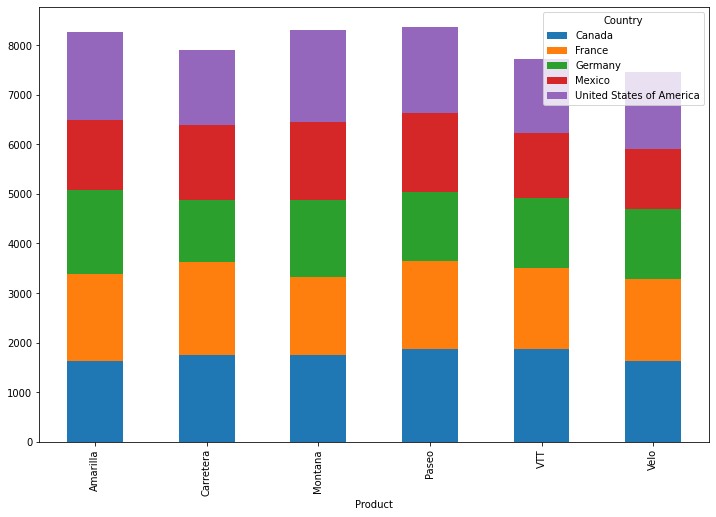

In [80]:
df.pivot_table(index='Product', columns='Country',values='Units Sold', 
               aggfunc='mean').plot(kind='bar', figsize = [12,8], legend=True, stacked=True)

To round it all out, . This project will automate the aggregation of data into a a multiple sheet excel report and give you a quick glimpse of the powerful and useful python library "xlsxwriter".

In [81]:
!pip install xlsxwriter

/usr/local/lib/python3.7/dist-packages/xlsxwriter/workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


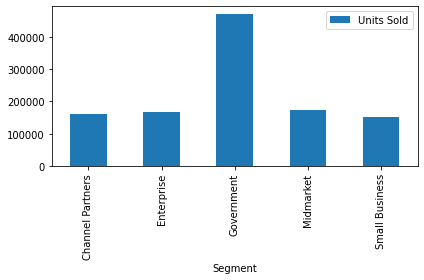

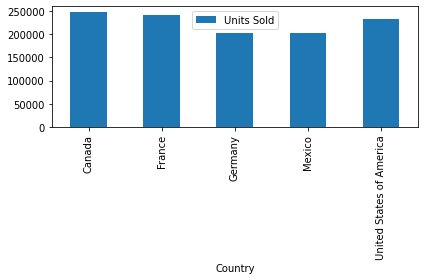

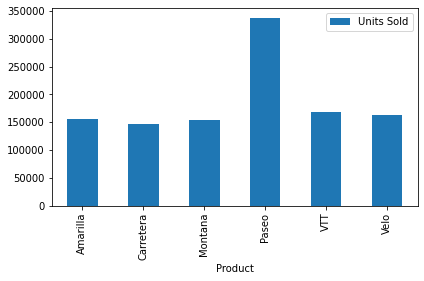

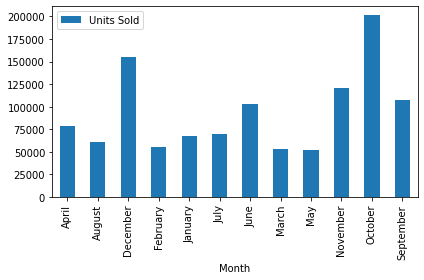

In [90]:
#importing pandas as the alias pd
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
%matplotlib inline

#creating the dataframe "df" object from the csv file
df = pd.read_excel('Financial Sample.xlsx', index_col=0)

#adding calculated columns
df['COGS'] = df.apply(lambda x: x['Units Sold'] * x['Manufacturing Price'],axis=1)
df['Gross Profit'] = df.apply(lambda x: x['Units Sold'] * x['Sale Price'], axis=1)
df['Net Income'] = df.apply(lambda x: x['Gross Profit'] - x['COGS'], axis=1)
df['Month'] = df['Date'].apply(lambda x: dt.datetime.strftime(x, '%B'))
df['Years Since Sale'] = df['Date'].apply(lambda x: relativedelta(dt.datetime.today(), x).years)


xlwriter = pd.ExcelWriter('Sales_Report_{}.xlsx'.format(dt.date.today()), engine='xlsxwriter')

agg_list = ['Segment', 'Country', 'Product', 'Month']

for col in agg_list:
  temp_pivot = df.pivot_table(index=col, values='Units Sold', aggfunc='sum')
  pivot_chart = temp_pivot.plot(kind="bar")
  temp_pivot.to_excel(xlwriter, sheet_name='{}'.format(col))
  plt.tight_layout()
  plt.savefig('{}.png'.format(col))
  worksheet=xlwriter.sheets['{}'.format(col)]
  worksheet.insert_image('D1','{}.png'.format(col))
  worksheet.set_column('B:B', 10)
  worksheet.set_column('A:A', 20)

xlwriter.save()

xlwriter.close()